In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression # estymator klasyfikacji=klasyfikator
from sklearn.model_selection import train_test_split # podział na zbiór testowy i treningowy
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, roc_auc_score,plot_roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix # podsumowanie klasyfikacji
from sklearn.decomposition import PCA # analiza głównych składowych - w celu redukcji wymiarowości danych
from scipy import signal
import scipy
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [2]:
df_rm=pd.read_csv("df_rm.csv")

In [3]:
df_rm.head()

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.70,0.00,34.0,0.9978,0.56,9.4,0
1,0.88,0.00,67.0,0.9968,0.68,9.8,0
2,0.76,0.04,54.0,0.9970,0.65,9.8,0
3,0.28,0.56,60.0,0.9980,0.58,9.8,0
4,0.66,0.00,40.0,0.9978,0.56,9.4,0


In [4]:
df_rm.shape

(1292, 7)

In [48]:
X = df_rm.drop("quality", axis=1)
y = df_rm["quality"]

In [49]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42)

In [50]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (969, 6)
Shape of X_test:  (323, 6)
Shape of y_train:  (969,)
Shape of y_test (323,)


In [9]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### oversampling ( metoda SMOTE) - w celu zrównoważenia danych

SMOTE (Technika nadpróbkowania syntetycznej mniejszości).
SMOTE nadpróbkuje klasę mniejszości, tworząc raczej „syntetyczne” przykłady niż kopie. 
Wiąże się to z kilkoma metodami, w tym najbliższymi sąsiadami, w celu wygenerowania prawdopodobnych nowych przykładów. 

In [71]:
SMOTE?

#### SMOTE z domyślnymi parametrami

In [54]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

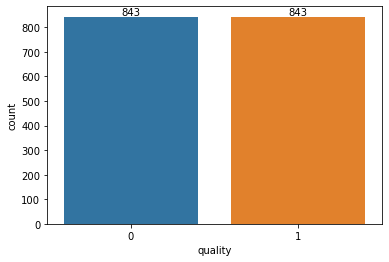

In [74]:
ax = sns.countplot(x=y_res)

abs_values = y_res.value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values);

In [55]:
X_res.shape

(1686, 6)

In [56]:
y_res.shape

(1686,)

In [59]:
rfc_over=RandomForestClassifier(n_estimators=30,random_state=42,bootstrap=True)
rfc_over.fit(X_res, y_res)
yPred_over=rfc_over.predict(X_test)


print(classification_report(y_test, yPred_over))
print(confusion_matrix(y_test, yPred_over))


print('accuracy is',accuracy_score(yPred_over,y_test))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       273
           1       0.45      0.68      0.54        50

    accuracy                           0.82       323
   macro avg       0.69      0.76      0.71       323
weighted avg       0.86      0.82      0.83       323

[[231  42]
 [ 16  34]]
accuracy is 0.8204334365325078


In [60]:
rec_over_rfc = recall_score(y_test, yPred_over)
print("The recall is {}".format(rec_over_rfc))
f1_over_rfc = f1_score(y_test, yPred_over)
print("The F1-Score is {}".format(f1_over_rfc))
prec_over_rfc = precision_score(y_test, yPred_over)
print("The precision is {}".format(prec_over_rfc))

The recall is 0.68
The F1-Score is 0.5396825396825397
The precision is 0.4473684210526316


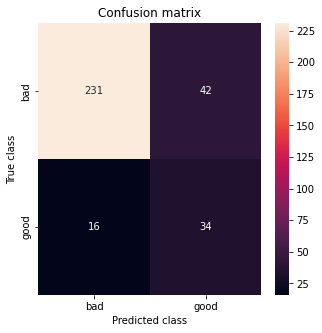

In [61]:
#Confusion Matrix

LABELS = ['bad', 'good']
conf_matrix = confusion_matrix(y_test, yPred_over)
plt.figure(figsize =(5, 5))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

C:\Users\ela\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


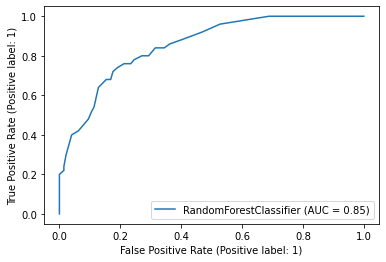

In [62]:
ROC_RF_over = plot_roc_curve(rfc_over, X_test, y_test)
plt.show()

### oversampling z parametrem sampling_strategy=0.50

In [63]:
sm1 = SMOTE(sampling_strategy=0.50,random_state=42)
X_res1, y_res1 = sm1.fit_resample(X_train, y_train)

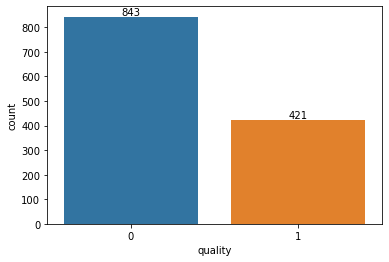

In [64]:
ax = sns.countplot(x=y_res1)

abs_values = y_res1.value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values);

In [65]:
rfc_over1=RandomForestClassifier(n_estimators=100,random_state=42,bootstrap=True,max_depth=None,min_samples_split=2)
rfc_over1.fit(X_res1, y_res1)
yPred_over1=rfc_over1.predict(X_test)


print(classification_report(y_test, yPred_over1))
print(confusion_matrix(y_test, yPred_over1))


print('accuracy is',accuracy_score(yPred_over1,y_test))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       273
           1       0.46      0.54      0.50        50

    accuracy                           0.83       323
   macro avg       0.69      0.71      0.70       323
weighted avg       0.84      0.83      0.84       323

[[241  32]
 [ 23  27]]
accuracy is 0.8297213622291022


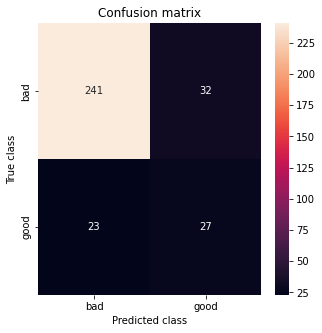

In [66]:
#Confusion Matrix

LABELS = ['bad', 'good']
conf_matrix = confusion_matrix(y_test, yPred_over1)
plt.figure(figsize =(5, 5))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### oversampling 0.75

In [67]:
sm2 = SMOTE(sampling_strategy=0.75,random_state=42)
X_res2, y_res2 = sm2.fit_resample(X_train, y_train)

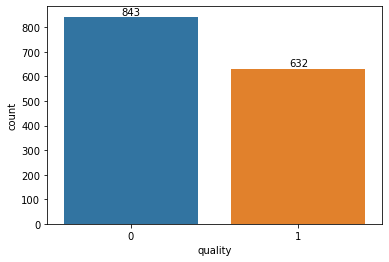

In [68]:
ax = sns.countplot(x=y_res2)

abs_values = y_res2.value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values);

In [69]:
rfc_over2=RandomForestClassifier(n_estimators=100,random_state=42,bootstrap=True,max_depth=None,min_samples_split=2)
rfc_over2.fit(X_res2, y_res2)
yPred_over2=rfc_over2.predict(X_test)


print(classification_report(y_test, yPred_over2))
print(confusion_matrix(y_test, yPred_over2))


print('accuracy is',accuracy_score(yPred_over2,y_test))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       273
           1       0.46      0.56      0.50        50

    accuracy                           0.83       323
   macro avg       0.69      0.72      0.70       323
weighted avg       0.85      0.83      0.84       323

[[240  33]
 [ 22  28]]
accuracy is 0.8297213622291022


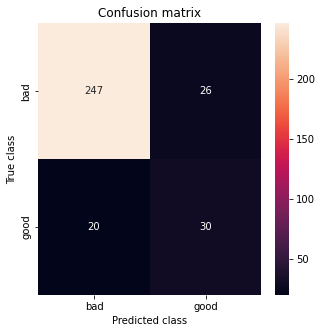

In [47]:
#Confusion Matrix

LABELS = ['bad', 'good']
conf_matrix = confusion_matrix(y_test, yPred_over2)
plt.figure(figsize =(5, 5))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#### oversampling 0.90

In [70]:
sm3 = SMOTE(sampling_strategy=0.90,random_state=42)
X_res3, y_res3 = sm3.fit_resample(X_train, y_train)

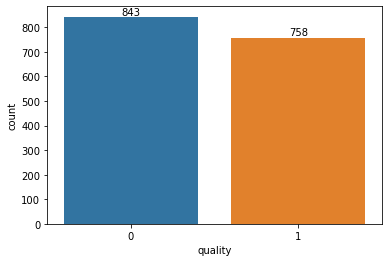

In [71]:
ax = sns.countplot(x=y_res3)

abs_values = y_res3.value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values);

In [72]:
rfc_over3=RandomForestClassifier(n_estimators=100,random_state=42,bootstrap=True,max_depth=None,min_samples_split=2)
rfc_over3.fit(X_res3, y_res3)
yPred_over3=rfc_over3.predict(X_test)


print(classification_report(y_test, yPred_over3))
print(confusion_matrix(y_test, yPred_over3))


print('accuracy is',accuracy_score(yPred_over3,y_test))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       273
           1       0.45      0.62      0.52        50

    accuracy                           0.82       323
   macro avg       0.69      0.74      0.71       323
weighted avg       0.85      0.82      0.83       323

[[235  38]
 [ 19  31]]
accuracy is 0.8235294117647058


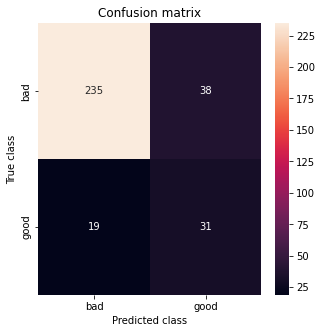

In [73]:
#Confusion Matrix

LABELS = ['bad', 'good']
conf_matrix = confusion_matrix(y_test, yPred_over3)
plt.figure(figsize =(5, 5))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()